In [111]:
import numpy as np
from itertools import product
from scipy.optimize import fsolve


class betrand_model(object):

    def __init__(self, **kwargs):
        """Initialize game with default values"""
        # Default properties
        self.numPlayers = 2
        self.alpha = kwargs.get('alpha', 0.15)
        self.beta = kwargs.get('beta', 4e-6)
        self.delta = kwargs.get('delta', 0.95)
        
        self.c = kwargs.get('c', 1)
        self.a = kwargs.get('a', 2)
        self.a0 = kwargs.get('a0', 0)
        self.mu = kwargs.get('mu', 0.25)
        self.penalty = kwargs.get('penalty',-1)
        self.reward = kwargs.get('reward',1)
        self.k = kwargs.get('k',15)
        self.numiActions = self.k**2
        self.numActions = self.numiActions ** self.numPlayers
        
        self.eps = kwargs.get('eps',0.5)

        
        
        # Derived properties
        self.indexActions = self.init_indexActions()

        self.p_minmax_cost_1 = self.compute_p_competitive_monopoly(c = 1)
        self.init_actions()
        
        self.Profits,self.Penalty = self.init_Profits()
        self.Q = self.init_Q()
        self.cActions = self.init_cActions()

        
    def demand(self, p):
        e = np.exp((self.a - p) / self.mu)
        d = e / (np.sum(e) + np.exp(self.a0 / self.mu))
        return d

    
    def foc(self, p, c):
        d = self.demand(p)
        zero = 1 - (p - c) * (1 - d) / self.mu
        return np.squeeze(zero)

    
    def foc_monopoly(self, p, c):
        d = self.demand(p)
        d1 = np.flip(d)
        p1 = np.flip(p)
        zero = 1 - (p - c) * (1 - d) / self.mu + (p1 - c) * d1 / self.mu
        return np.squeeze(zero)
    
    
    def foc1_monopoly(self,p,c):
        zero = -p + c + self.mu*(1+np.exp((self.a-p-self.a0)/self.mu))
        return zero
    def compute_p_monopoly_1(self,c):
        p0 = c
        p_monopoly = fsolve(self.foc1_monopoly,p0,args = (c,))
        return p_monopoly
    
    
    def compute_p_competitive_2(self,c):
        p0 = c
        p_competitive = fsolve(self.foc2_competitive,p0,args = (c,))
        return p_competitive
    def foc2_competitive(self,p,c):
        zero = -p + c + self.mu*(1+1/(1+np.exp((-self.a+p+self.a0)/self.mu)))
        return zero
    
    
    def foc2_monopoly(self,p,c):
        zero = -p + c + self.mu*(1+2*np.exp((self.a-p-self.a0)/self.mu))
        return zero
    def compute_p_monopoly_2(self,c):
        p0 = c
        p_monopoly = fsolve(self.foc2_monopoly,p0,args = (c,))
        return p_monopoly

    
    def compute_p_competitive_monopoly(self, c):

        p_competitive = self.compute_p_competitive_2(c)
        p_monopoly = self.compute_p_monopoly_2(c)
        return p_competitive, p_monopoly

    
    
    def init_actions(self):
        a = np.linspace(min(self.p_minmax_cost_1[0]), max(self.p_minmax_cost_1[1]), self.k - 2)
        delta = a[1] - a[0]
        A = np.linspace(min(a) - delta, max(a) + delta, self.k)
        self.player_actions = A
        self.player_cost = self.player_actions - self.mu*(1+1/(1 + \
                                      np.exp((self.a0-self.a+self.player_actions)/self.mu)))
        self.player_cost[np.abs(self.player_cost-self.c)<1e-5] = self.c
        self.buyer_action_list = A
        self.buyer_cost_list = self.player_cost
        self.seller_action_list = A
        self.seller_cost_list = self.player_cost
        self.buyerbrother_action_list = A
        self.buyerbrother_cost_list = self.player_cost
        self.sellerbrother_action_list = A
        self.sellerbrother_cost_list = self.player_cost
        
    
    def init_indexActions(self):
        
        indexActions = []
        for i in range(self.numActions):
            
            indexActions.append(self.convertNumberBase(i, self.numiActions, self.numPlayers))
            
        indexActions = np.array(indexActions)
        
        return indexActions

    
    
    def init_cActions(self):
        """Initialize cActions (used for q-learning)"""
        
        x = np.arange(self.numPlayers - 1, -1, -1)
        cActions = self.numiActions ** x
        
        return cActions

    
    def compute_profits(self, p, c):
        d = self.demand(p)
        pi = (p - c) * d
        return pi

    
    def init_Profits(self):
        Profits = np.zeros((2,self.numActions, self.numPlayers))
        Penalty = np.zeros((2,self.numActions, self.numPlayers))        
        Actions = np.zeros((self.numActions, 8))
        
        for i in range(self.numActions):
#             b = int(self.indexActions[i][0])
#             b_brother = int(self.indexActions[i][1])
#             s = int(self.indexActions[i][2])
#             s_brother = int(self.indexActions[i][3])
            
#             cb = self.buyer_cost_list[b]
#             cs = self.seller_cost_list[s]
#             vb = self.buyer_action_list[b]
#             vs = self.seller_action_list[s]
#             cb_b = self.buyerbrother_cost_list[b_brother]
#             cs_b = self.sellerbrother_cost_list[s_brother]
#             vb_b = self.buyerbrother_action_list[b_brother]
#             vs_b = self.sellerbrother_action_list[s_brother]            
            b = int(self.indexActions[i][0])
            s = int(self.indexActions[i][1])
            
            cb, cb_b = self.buyerActions[b]
            cs, cs_b = self.sellerActions[s]
            penalb = 0
            penals = 0
            pb = 0
            ps = 0
            
            Actions[i] = cb, cb_b, cs, cs_b
#             penalb = 0
#             penals = 0
#             penalb_b = 0
#             penals_b = 0
#             pb = 0
#             ps = 0
#             pb_b = 0
#             ps_b = 0
            
#             Actions[i] = cb, cs, vb, vs, cb_b, cs_b, vb_b, vs_b
            
            
            p_na = np.array([vb,vs])

            c_na = np.array([1,1])
            pb_na,ps_na = self.compute_profits(p_na,c_na)
            pb_b_na = pb_na
            pb_s_na = ps_na
            
                
        #AM mechanism starts here???SUN
#             if cb == cs:
            p = np.array([vb,vs])

            c = np.array([1,1])
            pb,ps = （1-self.eps)*self.compute_profits(p,c)
            pb_b = pb
            pb_s = ps

                
#             else:
#                 pb += 0.5*self.penalty
#                 ps += 0.5*self.penalty
#                 penals += 0.5*self.penalty
#                 penalb += 0.5*self.penalty
                
            price_b = self.compute_p_monopoly_1(c = cb_b)[0]
            p = np.array([price_b,100000])
            c = np.array([1,1])   
            pb_b,ps_b_ = self.eps*0.5*self.compute_profits(p,c)
                #pb = pb_b


            price_s = self.compute_p_monopoly_1(c = cs_b)[0]
            p = np.array([100000,price_s])
            c = np.array([1,1])                
            pb_b_,ps_b = self.eps*0.5*self.compute_profits(p,c)   
                #ps = ps_b

            if cb == cs_b:
                penalb = 0
                pb += 0

            else:
                penalb = self.penalty
                pb += self.penalty

            if cs == cb_b:
                penals =0
                ps += 0

            else:
                penals = elf.penalty
                ps += self.penalty
            #End here？？？SUN

#             #4players mechanism
#             if cb == cs:
#                 p = np.array([vb,vs])

#                 c = np.array([1,1])
#                 pb,ps = self.compute_profits(p,c)
#                 pb_b = pb
#                 pb_s = ps

                
#             else:
#                 pb += 0.5*self.penalty
#                 ps += 0.5*self.penalty
#                 penals += 0.5*self.penalty
#                 penalb += 0.5*self.penalty
                
#                 price_b = self.compute_p_monopoly_1(c = cb_b)[0]
#                 p = np.array([price_b,100000])
#                 c = np.array([1,1])   
#                 pb_b,ps_b_ = self.compute_profits(p,c)
#                 #pb = pb_b


#                 price_s = self.compute_p_monopoly_1(c = cs_b)[0]
#                 p = np.array([100000,price_s])
#                 c = np.array([1,1])                
#                 pb_b_,ps_b = self.compute_profits(p,c)   
#                 #ps = ps_b

#                 if cb == cs_b:
#                     penalb = 0.5*self.reward
#                     pb += 0.5*self.reward

#                 else:
#                     penalb = 0.5*self.penalty
#                     pb += 0.5*self.penalty

#                 if cs == cb_b:
#                     penals = 0.5*self.reward
#                     ps += 0.5*self.reward

#                 else:
#                     penals = 0.5*self.penalty
#                     ps += 0.5*self.penalty
#             print('cb:',format(cb,'.2f'),'   cb_b:',format(cb_b,'.2f'),'   cs:',format(cs,'.2f'),\
#             '   cs_b:',format(cs_b,'.2f'),'   pb:',format(pb,'.2f'),'   ps:',format(ps,'.2f'),
#             '   pb_b:',format(pb_b,'.4f'),'   ps_b:',format(ps_b,'.4f'))

            Profits[1][i] = [pb, pb_b, ps, ps_b]
            Penalty[1][i] = [penalb,penalb_b,penals,penals_b]
            Profits[0][i] = [pb_na, pb_b, ps_na, ps_b]
            Penalty[0][i] = [penalb,penalb_b,penals,penals_b]            

        return Profits,Penalty
            
            

    
    def init_Q(self):
        Q = np.zeros((self.numActions, self.numiActions, self.numPlayers))
        for iReport in range(self.numiActions):
            
            den = np.count_nonzero(self.indexActions == iReport,axis = 0,keepdims = True) * (1 - self.delta)
            Q[:, iReport,:] = np.ma.array((1 - self.eps)*self.Profits[0]+self.eps * self.Profits[1],
                                mask=(self.indexActions != iReport)).sum(axis = 0) / den
        return Q
    
    
    @staticmethod
    def convertNumberBase(n, b, l):
        '''
        Converts an integer n from base 10 to base b,
        generating a vector of integers of length l
        '''
        tmp = n
        ans = np.zeros(l)
        for i in range(1, l+1):
            ans[l-i] = int(tmp % b)
            tmp = np.floor(tmp/b)
        return ans



In [7]:
b_model = betrand_model()

In [112]:
import numpy as np

# from SRModel import SRModel

    
class betrand_Qlearning(object):
    '''
        Qlearning based on SR model
    '''
    def __init__(self, **kwargs):

        self.delta = kwargs.get('delta', 0.95)
        
        self.reward = kwargs.get('reward',50)
        self.penalty = kwargs.get('penalty',-50)

        self.convergedtime = kwargs.get('convergedtime',500)
        self.numSessions = kwargs.get('numSessions',1)
        self.maxIters = kwargs.get('maxIters',100000)
        self.true_value_index = kwargs.get('true_value',1)
        self.c = kwargs.get('c',1)
        
        self.eps = kwargs.get('eps',0.5)

        self.game = betrand_model(delta = self.delta,true_value = self.true_value_index,\
                                   reward = self.reward,penalty = self.penalty,c = self.c,eps = self.eps)
        
        self.state_list = np.full((self.numSessions,self.maxIters,self.game.numPlayers),np.nan)
        
        for i in range(15):
            if np.abs(self.game.player_cost[i] - self.c)<1e-5:
                self.c_index = i
#         print(self.game.player_cost)
#         print(self.c_index)
        self.alpha = kwargs.get('alpha', 0.25) * np.ones(self.game.numPlayers)
        self.beta = kwargs.get('beta', 0.0005) * np.ones(self.game.numPlayers)
        self.initial_state = kwargs.get('initial_state',10)

        
        
        self.delta = kwargs.get('delta',0.95)
        
               
    def computePPrime(self, strategyPrime, iters):
        
        pPrime = np.zeros(self.game.numPlayers)
        #  Greedy with probability 1-epsilon, with exponentially decreasing epsilon
        
        for iPlayer in range(self.game.numPlayers):
            
            if np.random.uniform(0,1) < np.exp(-self.beta[iPlayer]*iters):

                pPrime[iPlayer] = np.floor(self.game.numiActions*np.random.uniform(0,1))
            else:
                pPrime[iPlayer] = strategyPrime[iPlayer]
                
        return pPrime


    def q_learning(self):

        # Initializing various quantities

        indexStrategies = np.zeros((self.game.numPlayers,self.numSessions))

        indexConverge = np.zeros((2,self.numSessions))
        
        self.profit_list = np.full((self.numSessions,self.maxIters,self.game.numPlayers),np.nan)
        self.penalty_list = np.full((self.numSessions,self.maxIters,self.game.numPlayers),np.nan)

        # Loop over numSessions
        for iSession in range(self.numSessions):
            
            
            # Learning Phase
            
            # Initialization
            self.Q = self.game.Q.copy()
            self.strategyPrime = np.zeros(self.game.numPlayers)
            maxVal = np.zeros(self.game.numPlayers)
            
            strategyPrime = np.floor(np.random.uniform(0,1,(self.game.numPlayers))*self.game.numiActions)   

            state = int(np.sum(self.game.cActions*strategyPrime)) 

            
            # Loop
            itersInStrategy = 0
            convergedSession = -1
            
            strategyFix = np.zeros(self.game.numPlayers)
            
            for iters in range(self.maxIters):
                old_strategy = strategyPrime.copy()
                
                # Iterations counter
                
                for iPlayer in np.array([1,3]):
                    
                    temp_q = self.game.Q[state,:,iPlayer]
                    #print(iters,temp_q)
                    maxVal[iPlayer] = np.max(temp_q)
                    #print(iters,maxVal)

                    strategyPrime[iPlayer] = self.c_index
                    
                
                for iPlayer in np.array([0,2]):
                    
                    temp_q = self.Q[state,:,iPlayer]
                    #print(iters,temp_q)
                    maxVal[iPlayer] = np.max(temp_q)
                    #print(iters,maxVal)

                    strategyPrimeList = np.where(temp_q == maxVal[iPlayer])[0]
                    #print(iters,strategyPrimeList)
                    
                    u = np.random.uniform(0, 1)
                    strategyPrime[iPlayer] = strategyPrimeList[int(len(strategyPrimeList)*u)]
     
                state1 = int(np.sum(self.game.cActions*strategyPrime))     
                pPrime = self.computePPrime(strategyPrime, iters)
                state2 = int(np.sum(self.game.cActions*pPrime)) 

                
                for iPlayer in np.array([1,3]):
                    
                    temp_q = self.game.Q[state1,:,iPlayer]
                    #print(iters,temp_q)
                    maxVal[iPlayer] = np.max(temp_q)
                    #print(iters,maxVal)
                    
                
                for iPlayer in np.array([0,2]):
                    
                    temp_q = self.Q[state1,:,iPlayer]
                    #print(iters,temp_q)
                    maxVal[iPlayer] = np.max(temp_q)
                    #print(iters,maxVal)
                
                for iPlayer in range(self.game.numPlayers):
                    
                    # Q matrices and strategies update
                    if np.random.uniform(0, 1) < 1 - self.game.eps:
                        profits = self.game.Profits[0][state2, iPlayer]
                    else:
                        profits = self.game.Profits[1][state2, iPlayer]
                        
                    oldq = self.Q[state, int(pPrime[iPlayer]), iPlayer]
                    newq = oldq + self.alpha[iPlayer] * (profits + \
                                                self.delta * maxVal[iPlayer] - oldq)
                    #print('pppppp',state1)
                    self.Q[state, int(pPrime[iPlayer]), iPlayer] = newq
                    
                state = state1

                #print(pPrime)
                self.state_list[iSession,iters,:] = pPrime
                # Assessing convergence
                if iters>1900000:
                    print(strategyPrime)
                vb = self.game.buyer_action_list[int(pPrime[0])]
                vs = self.game.seller_action_list[int(pPrime[1])]
                
                vb_1 = self.game.buyer_action_list[int(strategyPrime[0])]
                vs_1 = self.game.seller_action_list[int(strategyPrime[1])]  
                #print(strategyPrime,vb,vb_1,vs,vs_1)
                if vb == vb_1 and vs == vs_1:
                    itersInStrategy = itersInStrategy + 1
                else:
                    itersInStrategy = 1

                # Check for convergence in strategy
                if convergedSession == -1:
                    # Maximum number of iterations exceeded
                    if iters >= self.maxIters - 1:
                        convergedSession = 0


                    if itersInStrategy == self.convergedtime:
                        convergedSession = 1

                    strategyFix = strategyPrime.copy()               #testing

                # Check for loop exit criteria
                if convergedSession != -1:
                    break
                # if no converge yet, update and iterate
    
            indexConverge[:,iSession] = (convergedSession, iters)
            #print(indexStrategies,strategyFix)
            indexStrategies[:,iSession] = strategyFix
            self.indexConverge = indexConverge
            self.indexStrategies = indexStrategies
            #print(iSession,convergedSession)

        return indexConverge, indexStrategies



    

In [120]:
K = betrand_Qlearning(numSessions = 1,delta = 0.95,alpha = 0.25,beta = 0.0001,
                 true_value = 1,penalty = -2,reward = 2,c = cost[6],eps = 0.05,
                 convergedtime = 500,maxIters = 100000)
R = K.q_learning()



print(R)


(array([[1.0000e+00],
       [5.2173e+04]]), array([[6.],
       [6.],
       [6.],
       [6.]]))


0


Text(0.5, 1.0, 'price choice for 4 players true price = 1.661 with eps = 0.10')

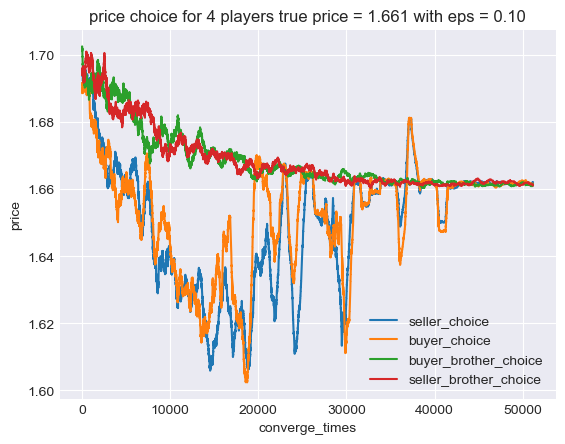

In [125]:
ll = K.state_list.copy()

indexes1 = np.where(~np.isnan(K.state_list[0,:,0]))[0][-1] + 1

for i in range(15):
    ll[ll==i]=K.game.buyer_action_list[i]
    
agree_ab_truth_list1 = np.full((indexes1),np.nan)
disagree_ab_truth_list1 = np.full((indexes1),np.nan)
agree_ab_lies_list1 = np.full((indexes1),np.nan)
disagree_ab_lies_list1 = np.full((indexes1),np.nan)
for i in range(indexes1):
    if i%100000 ==0:
        print(i)
    if i>=1000:
        buyer_list = ll[0,i-1000:i,0]
        buyer_brother_list = ll[0,i-1000:i,1]
        seller_list = ll[0,i-1000:i,2]
        seller_brother_list = ll[0,i-1000:i,3]

                              
        agree_ab_truth_list1[i-1000] = np.mean(buyer_list)
        disagree_ab_truth_list1[i-1000] = np.mean(buyer_brother_list)
        agree_ab_lies_list1[i-1000] = np.mean(seller_list)
        disagree_ab_lies_list1[i-1000] = np.mean(seller_brother_list)
        
plt.style.use('seaborn-darkgrid')
plt.plot(agree_ab_lies_list1)
plt.plot(agree_ab_truth_list1)
plt.plot(disagree_ab_lies_list1)
plt.plot(disagree_ab_truth_list1)
plt.legend(labels=['seller_choice','buyer_choice',\
                  'buyer_brother_choice','seller_brother_choice'],loc='best')
plt.xlabel('converge_times')
plt.ylabel('price')
plt.title('price choice for 4 players true price = %.3f with eps = %.2f'\
          %(K.game.buyer_action_list[int(K.c_index)],0.1))

In [83]:
K.game.buyer_action_list[4]

1.5859402247774075

In [85]:
K.game.buyer_action_list[int(K.c_index)]

1.5859402247774075

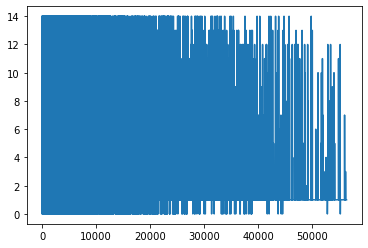

In [37]:
plt.plot(K.state_list[0,:,2])

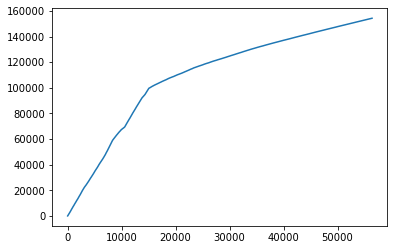

In [38]:
plt.plot(K.state_list[0,:,2].cumsum())

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000


Text(0.5, 1.0, 'price choice for buyer and seller and brothers')

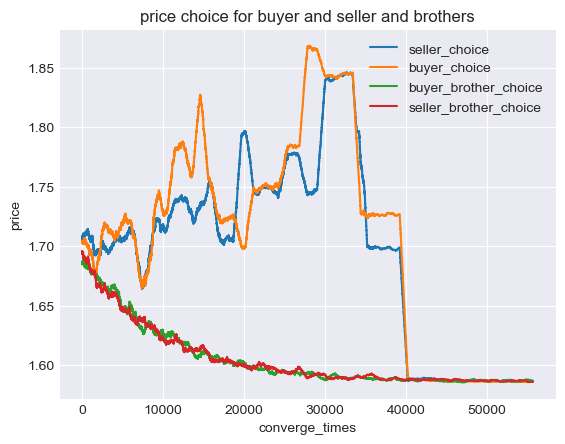

In [79]:
plt.style.use('seaborn-darkgrid')
plt.plot(agree_ab_lies_list1)
plt.plot(agree_ab_truth_list1)
plt.plot(disagree_ab_lies_list1)
plt.plot(disagree_ab_truth_list1)
plt.legend(labels=['seller_choice','buyer_choice',\
                  'buyer_brother_choice','seller_brother_choice'],loc='best')
plt.xlabel('converge_times')
plt.ylabel('price')
plt.title('price choice for buyer and seller and brothers')

In [76]:
ll = K.state_list.copy()

In [75]:
plt.style

['seaborn-darkgrid']

In [18]:
ll

array([[[1.69895379, 1.62361141, 1.6612826 , 1.51059785],
        [1.69895379, 1.43525547, 1.73662498, 1.77429617],
        [1.73662498, 1.96265211, 1.69895379, 1.6612826 ],
        ...,
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan]]])

In [19]:
agree_ab_truth_list1 = np.full((indexes1),np.nan)
disagree_ab_truth_list1 = np.full((indexes1),np.nan)
agree_ab_lies_list1 = np.full((indexes1),np.nan)
disagree_ab_lies_list1 = np.full((indexes1),np.nan)
for i in range(indexes1):
    if i%1000 ==0:
        print(i)
    if i>=1000:
        buyer_list = ll[0,i-1000:i,0]
        buyer_brother_list = ll[0,i-1000:i,1]
        seller_list = ll[0,i-1000:i,2]
        seller_brother_list = ll[0,i-1000:i,3]

                              
        agree_ab_truth_list1[i-1000] = np.mean(buyer_list)
        disagree_ab_truth_list1[i-1000] = np.mean(buyer_brother_list)
        agree_ab_lies_list1[i-1000] = np.mean(seller_list)
        disagree_ab_lies_list1[i-1000] = np.mean(seller_brother_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000


In [29]:
cost = K.game.buyer_cost_list

In [65]:
for i in ll:
    K = betrand_Qlearning(numSessions = 1,delta = 0.95,alpha = 0.25,beta = 0.0001,
                     true_value = 1,penalty = -2,reward = 2,c = i,
                     convergedtime = 500,maxIters = 100000)
    R = K.q_learning()

    print('true_cost:',K.c_index,'     player1:',int(R[1][0][0]),'     player_brother:',int(R[1][1][0]),\
          '     player2:',int(R[1][2][0]),'     player2_brother:',int(R[1][3][0]))

true_cost: 0      player1: 0      player_brother: 0      player2: 0      player2_brother: 0
true_cost: 1      player1: 3      player_brother: 1      player2: 3      player2_brother: 1
true_cost: 2      player1: 2      player_brother: 2      player2: 2      player2_brother: 2
true_cost: 3      player1: 3      player_brother: 3      player2: 3      player2_brother: 3
true_cost: 4      player1: 13      player_brother: 4      player2: 13      player2_brother: 4
true_cost: 5      player1: 5      player_brother: 5      player2: 5      player2_brother: 5
true_cost: 6      player1: 6      player_brother: 6      player2: 6      player2_brother: 6
true_cost: 7      player1: 7      player_brother: 7      player2: 7      player2_brother: 7
true_cost: 8      player1: 8      player_brother: 8      player2: 8      player2_brother: 8
true_cost: 9      player1: 9      player_brother: 9      player2: 9      player2_brother: 9
true_cost: 10      player1: 10      player_brother: 10      player2: 10      p

In [62]:
R[1][0]

array([0.])

In [14]:
K.game.Q.shape

(50625, 15, 4)

In [290]:
lll = np.array([[196., 196., 111., 136., 201., 196., 196., 196.,  67., 151., 196.,
        140., 196.,  35., 203.,  80., 217., 199., 196., 155., 143.,  64.,
        219., 181., 196., 196., 196., 224., 196.,  60., 208., 196., 208.,
        196., 196., 217.,  82., 196., 196., 196., 223., 196., 196., 109.,
         77., 196., 140., 196., 210., 210., 196., 204., 196., 170., 196.,
        196., 152., 206.,  63., 198., 124., 196.,   5., 200., 196., 196.,
        196.,  22.,  99., 196.,  79., 196., 196., 216., 196., 196., 127.,
        203.,  32.,  90., 156., 196.,  95., 196., 171., 196.,  77.,  43.,
        172.,  84.,  55.,  19., 196., 130., 196.,  30.,  32.,  34., 151.,
         54.],
       [196., 196., 109., 137., 204., 196., 196., 196.,  65., 156., 196.,
         36., 196.,  43., 196.,  85., 211., 195., 196., 153., 144.,  69.,
        223.,   8., 196.,  14., 196., 216., 196.,  64., 206., 195., 196.,
        196., 196., 216.,  79., 196., 196., 196.,  92., 196., 196., 117.,
         77., 196., 138., 196., 210., 210., 196., 199., 196., 171., 196.,
        201.,  50., 195.,  62., 196., 120., 208.,   5., 196., 196., 196.,
        196.,  25., 101., 203., 146., 196., 196.,  20., 196., 196., 134.,
        196.,  37.,  96., 155., 196., 100., 196., 172., 196., 196., 203.,
        166.,  87., 196.,  15., 196., 127., 196.,  36.,  34., 142., 161.,
         51.]])

In [291]:
llll = lll//15
index =index0 = index1 = index2 = index3 = index4 =index5 = \
    index6 = index7 = index8 = index9 =index10 = index11 = index12 = index13 = index14 = 0
for i in range(100):
    if llll[1,i] == llll[0,i]:
        index +=1
        if llll[1,i] == 0:
            index0 +=1
        if llll[1,i] == 1:
            index1 +=1
        if llll[1,i] == 2:
            index2 +=1
        if llll[1,i] == 3:
            index3 +=1
        if llll[1,i] == 4:
            index4 +=1
        if llll[1,i] == 5:
            index5 +=1
        if llll[1,i] == 6:
            index6 +=1
        if llll[1,i] == 7:
            index7 +=1
        if llll[1,i] == 8:
            index8 +=1
        if llll[1,i] == 9:
            index9 +=1
        if llll[1,i] == 10:
            index10 +=1
        if llll[1,i] == 11:
            index11 +=1
        if llll[1,i] == 12:
            index12 +=1
        if llll[1,i] == 13:
            index13 +=1
        if llll[1,i] == 14:
            index14 +=1

Text(0.5, 1.0, '0.89')

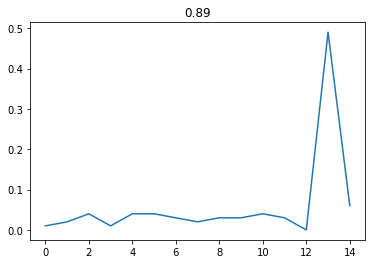

In [292]:
import matplotlib.pyplot as plt
plt.plot(range(0,15),np.array([index0/100,index1/100,index2/100,index3/100,index4/100,index5/100,index6/100,index7/100,index8/100,\
index9/100,index10/100,index11/100,index12/100,index13/100,index14/100]))
plt.title('{:.2f}'.format(index/100))

In [288]:
K.game.player_cost

array([0.95889993, 1.        , 1.04152937, 1.08352162, 1.1260071 ,
       1.16901106, 1.21255145, 1.25663669, 1.30126337, 1.34641424,
       1.39205666, 1.43814179, 1.48460469, 1.53136563, 1.57833246])

In [9]:
np.array([1,2,3])[0]

1

In [89]:
        for s in b_model.action_list:
            print(b_model.compute_profits(s))

[0.20682553 0.20682553]
[0.22155186 0.2070539 ]
[0.23600529 0.20482047]
[0.2500352  0.20041303]
[0.26350889 0.19415033]
[0.27631598 0.18636658]
[0.28837091 0.17739646]
[0.29961382 0.16756186]
[0.31000971 0.15716109]
[0.31954627 0.14646121]
[0.32823096 0.13569327]
[0.3360875  0.12505043]
[0.34315225 0.11468832]
[0.34947076 0.10472711]
[0.35509455 0.0952549 ]
[0.2070539  0.22155186]
[0.22292666 0.22292666]
[0.23866335 0.22163041]
[0.25409097 0.21792449]
[0.26905004 0.2121133 ]
[0.2834008 0.2045291]
[0.29702771 0.19551608]
[0.30984202 0.18541533]
[0.32178241 0.17455169]
[0.33281401 0.16322342]
[0.34292597 0.15169495]
[0.35212819 0.14019278]
[0.36044761 0.12890402]
[0.36792429 0.11797738]
[0.37460776 0.10752566]
[0.20482047 0.23600529]
[0.22163041 0.23866335]
[0.23846389 0.23846389]
[0.25513124 0.23563339]
[0.27145021 0.23045249]
[0.2872537  0.22324207]
[0.3023962 0.2143474]
[0.31675832 0.20412196]
[0.33024927 0.19291233]
[0.34280734 0.18104534]
[0.35439862 0.16881816]
[0.36501435 0.156491

In [90]:
b_model.compute_profits(b_model.action_list)

array([[0.00226462, 0.00226462],
       [0.00226462, 0.00211642],
       [0.00226462, 0.00196538],
       [0.00226462, 0.00181518],
       [0.00226462, 0.00166854],
       [0.00226462, 0.00152741],
       [0.00226462, 0.00139312],
       [0.00226462, 0.00126651],
       [0.00226462, 0.00114806],
       [0.00226462, 0.00103797],
       [0.00226462, 0.00093621],
       [0.00226462, 0.00084261],
       [0.00226462, 0.00075688],
       [0.00226462, 0.00067865],
       [0.00226462, 0.00060749],
       [0.00211642, 0.00226462],
       [0.00211642, 0.00211642],
       [0.00211642, 0.00196538],
       [0.00211642, 0.00181518],
       [0.00211642, 0.00166854],
       [0.00211642, 0.00152741],
       [0.00211642, 0.00139312],
       [0.00211642, 0.00126651],
       [0.00211642, 0.00114806],
       [0.00211642, 0.00103797],
       [0.00211642, 0.00093621],
       [0.00211642, 0.00084261],
       [0.00211642, 0.00075688],
       [0.00211642, 0.00067865],
       [0.00211642, 0.00060749],
       [0.

In [89]:
b_model.indexActions.shape

(256, 2)

In [90]:
b_model.Profits.shape

(256, 2)

In [95]:
for i in range(K.game.numActions):
    print('____________________________________________________________________')
    b = int(K.game.indexActions[i][0])
    s = int(K.game.indexActions[i][1])

    cb,cb_a = K.game.buyer_cost_list[b]
    cs,cs_a = K.game.seller_cost_list[s]
    vb,vb_a = K.game.buyer_action_list[b]
    vs,vs_a = K.game.seller_action_list[s]
    penalb = 0
    penals = 0
    
    print('cb:',cb,'cs:',cs,'cb_a:',cb_a,'cs_a:',cs_a)
    print('buyer profits:',K.game.Profits[i][0])
    print('seller profits:',K.game.Profits[i][1])

____________________________________________________________________
cb: 0.5257528425553404 cs: 0.5257528425553404 cb_a: 0.5257528425553404 cs_a: 0.5257528425553404
buyer profits: 0.010333329880936354
seller profits: 0.010333329880936354
____________________________________________________________________
cb: 0.5257528425553404 cs: 0.5257528425553404 cb_a: 0.5257528425553404 cs_a: 1.0
buyer profits: 0.010333329880936354
seller profits: 0.010333329880936354
____________________________________________________________________
cb: 0.5257528425553404 cs: 0.5257528425553404 cb_a: 0.5257528425553404 cs_a: 1.531365625336648
buyer profits: 0.010333329880936354
seller profits: 0.010333329880936354
____________________________________________________________________
cb: 0.5257528425553404 cs: 0.5257528425553404 cb_a: 0.5257528425553404 cs_a: 2.0817315522524162
buyer profits: 0.010333329880936354
seller profits: 0.010333329880936354
________________________________________________________________

In [122]:
def compute_p_competitive_monopoly(c):
    p0 = np.ones((1, 2)) * 1 * c
    p_competitive = fsolve(K.game.foc, p0,args = (c,))
    p_monopoly = fsolve(K.game.foc_monopoly, p0,args = (c,))
    return p_competitive, p_monopoly

In [123]:
compute_p_competitive_monopoly(1)

(array([1.47292666, 1.47292666]), array([1.92498092, 1.92498092]))

In [124]:
compute_p_competitive_monopoly(0.52)

(array([1.01522646, 1.01522646]), array([1.81557214, 1.81557214]))

In [125]:
def compute_p_competitive_monopoly(c):
    p0 = np.ones((1, 2)) * 1 * c
    p_competitive = fsolve(K.game.foc, p0,args = (,c))
    p_monopoly = fsolve(K.game.foc_monopoly, p0,args = (,c))
    return p_competitive, p_monopoly

SyntaxError: invalid syntax (2600325829.py, line 3)

In [137]:
    def demand(p):
        e = np.exp((K.game.a - p) / K.game.mu)
        d = e / (np.sum(e) + np.exp(K.game.a0 / K.game.mu))
        return d
    
    def foc(p,c):

        d = demand(p)
        zero = 1 - (p - c) * (1 - d) / K.game.mu
        return np.squeeze(zero)

    
    def foc_monopoly(p,c):

        d = demand(p)
        d1 = np.flip(d)
        p1 = np.flip(p)
        zero = 1 - (p - c) * (1 - d) / K.game.mu + (p1 - c) * d1 / K.game.mu
        return np.squeeze(zero)

In [128]:
fsolve(foc,np.ones((1, 2)) * 1 * 0.52)

array([1.01522646, 1.01522646])

In [132]:
fsolve(foc_monopoly,np.ones((1, 2)) * 1 * 0.52)

array([1.81557214, 1.81557214])

In [139]:
fsolve(foc_monopoly,np.ones((1, 2)) * 3 * c,args = (0.52,))

array([1.81557214, 1.81557214])

In [140]:
fsolve(foc_monopoly,np.ones((1, 2)) * 3 * c,args = (1,))

array([1.92498092, 1.92498092])

In [150]:
fsolve(dev,3*1,args = (1,))

array([1.92498092])

In [149]:
def dev(p,c):
    zero = -p+c+K.game.mu*(1+2*np.exp((K.game.a-p-K.game.a0)/K.game.mu))
    return zero